# Investment Case Group Project

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
dirpath = 'C:/Users/ankit.bhatia/Documents/GitHub/PythonScripts/data/spark_funds/'
dir_out = 'C:/Users/ankit.bhatia/Documents/GitHub/PythonScripts/data/spark_funds/user_defined/'
file1 = 'companies.txt'
file2 = 'rounds2.csv'
file3 = 'mapping.csv'

## Checkpoint 1: Data Cleaning

In [2]:
# Loading datasets into pandas dataframe.
companies = pd.read_csv(dirpath+file1,sep='\t',encoding='iso-8859-1')
rounds2 = pd.read_csv(dirpath+file2,encoding='iso-8859-1') # Use 'iso-8859-1' for accented characters
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [3]:
# Get some insight
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [4]:
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


### Table 1.1
#### Q1. How many unique companies are present in rounds2?

In [5]:
# .count() will give the total no of rows.
#rounds2.company_permalink.count()

# Unique count which excludes NA as well by default
rounds2.company_permalink.nunique()

90247

#### Q2. How many unique companies are present in companies?

In [6]:
companies.permalink.nunique()

66368

#### Q3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [7]:
# Ist Method
#nunique() will give unique values for each column, column with maximum unique counts can be considered as unique column#### 
companies.nunique().sort_values(ascending=False).iloc[0:1]

# IInd Method
# Companies.describe() will give count, unique, top etc information, we store count & unique values in a temp df and
# then subtracting unique values(1) from count(0) and giving the column name where difference is 0
#companies.describe().iloc[0:2]


permalink    66368
dtype: int64

#### Q4. Are there any companies in the rounds2 file which are not  present in companies ?

In [8]:
# Check the existacce of a column of dataframe1 in column1 of dataframe2
rounds2[rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower())== False]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


#### Q5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [9]:
# lower() the key columns of both dataframes, so they can match in case of diffence in case.
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
master_frame = pd.merge(left = companies,right = rounds2, how ='inner', left_on='permalink',right_on='company_permalink')
master_frame.shape[0]
# From here we will work with master_frame only

114942

In [10]:
# Drop Rows from master_frame where raised_amount_usd is null
master_frame = master_frame.drop(master_frame[master_frame.raised_amount_usd.isnull()].index)

#### Define Function

In [11]:
# Defining a method to wite(.csv) a file to the user location.
def writeDF(dataframe,filename,dir_path):
    dataframe.to_csv(path_or_buf = dir_out+filename+'.csv')
    size = str(round((os.path.getsize(dir_out+filename+'.csv')/1000),1))
    print('File: '+filename+'.csv created at '+dir_out+ '\nSize of file :'+size+ ' KB' )

#### Storing Data

In [12]:
# Storing master_frame dataframe at user location, we can then use this .csv directly in Tableau
writeDF(master_frame,'master_frame',dir_out)

File: master_frame.csv created at C:/Users/ankit.bhatia/Documents/GitHub/PythonScripts/data/spark_funds/user_defined/
Size of file :23784.3 KB


## Checkpoint 2: Funding Type Analysis
### Table 2.1 ( Average Values of Investments for Each of these Funding Types)

#### Define Function

In [13]:
# defining a function to get average funding amount for any funding type.
def avg_funding_amount(funding_type):
    return master_frame[master_frame['funding_round_type']==funding_type]['raised_amount_usd'].mean()

#### Q1/2/3/4. Average funding amount of different funding type ?

In [14]:
venture = avg_funding_amount('venture')
angel = avg_funding_amount('angel')
seed = avg_funding_amount('seed')
private_equity = avg_funding_amount('private_equity')

print('venture' ,avg_funding_amount('venture'))
print('angel' ,avg_funding_amount('angel'))
print('seed' ,avg_funding_amount('seed'))
print('private_equity' ,avg_funding_amount('private_equity'))

venture 11748949.129489528
angel 958694.4697530865
seed 719779.6202016778
private_equity 73308593.02944215


#### Q5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [15]:
# We can check from the last step that only venture funding type lies between 5 to 15 million.
# Alternatively we can find the funding type through below code:
## [['']] double brackets or (.reset_index()) are used to keep the dataframe , if we use [''], it will be converted into series
most_suitable = master_frame.groupby(by='funding_round_type')[['raised_amount_usd']].mean()
most_suitable = most_suitable[(most_suitable.raised_amount_usd >= 5000000) & (most_suitable.raised_amount_usd <= 15000000)]
most_suitable

,raised_amount_usd
funding_round_type,
venture,1.174895e+07


In [16]:
# Filter the master_frame dataset based on the above conditions(funding_round_type)
master_frame_filtered = master_frame[master_frame.funding_round_type == most_suitable.index[0]]

master_frame_filtered.head(3)
# Now master_frame_filtered contains the data where funding_round_type ='venture' & raised_amount_usd between 5 to 15 million.

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Checkpoint 3: Country Analysis
### Table 3.1 ( Analysing the Top 3 English-Speaking Countries)

In [17]:
top9 = master_frame_filtered.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()[0:9]
top9.count()

country_code         9
raised_amount_usd    9
dtype: int64

In [18]:
# Now the requirement is to fetch top 3 countries from top 9 dataframe where official language is English, we will fetch this 
# information from MySQl > world database > country & country language table. Alternatively we can check this information
# from the pdf provided, but there we have to hardcode the information.
# Note : To match the countries in the countrylanguage table data with pdf data, I have inserted one entry of IND with
# official language is English.(update COUNTRYLANGUAGE set ISOFFICIAL='T' where countrycode= 'IND')
# installed mysql connector for python using conda install -c anaconda mysql-connector-python

import mysql.connector as con
db_connection = con.connect(host='localhost', database='world', user='root', password='mysql@123')
query = 'select code,name from country where code in(SELECT countrycode FROM COUNTRYLANGUAGE WHERE LANGUAGE=%s AND ISOFFICIAL=%s)'

#countryEN contains all the country codes where official language is English
countryEN =  pd.read_sql(sql =query,con =db_connection,params=['English','T'])

In [19]:
# Add a new column identifier, IsOfficialEN in top9 dataframe.
top9['IsOfficialEN'] = top9.country_code.isin(countryEN['code'])
top9

,country_code,raised_amount_usd,IsOfficialEN
0,USA,4.225108e+11,True
1,CHN,3.983542e+10,False
2,GBR,2.024563e+10,True
3,IND,1.439186e+10,True
4,CAN,9.583332e+09,True
5,FRA,7.259537e+09,False
6,ISR,6.907515e+09,False
7,DEU,6.346960e+09,False
8,JPN,3.363677e+09,False


#### Storing Data

In [20]:
# Storing top9 dataframe at user location, we can then use this .csv directly in Tableau
writeDF(top9,'top9',dir_out)

File: top9.csv created at C:/Users/ankit.bhatia/Documents/GitHub/PythonScripts/data/spark_funds/user_defined/
Size of file :0.3 KB


#### Q1/2/3. Top/Second/Third English speaking country ?

In [21]:
top3 = top9[top9.IsOfficialEN].iloc[0:3,0:2].reset_index()
top = top3.country_code[0]
second = top3.country_code[1]
third = top3.country_code[2]

print('top ',top)
print('second ',second)
print('third ',third)

top  USA
second  GBR
third  IND


In [22]:
# Filter master_frame_filtered dataset based on top 3 english speaking countries
top3_data = master_frame_filtered.loc[master_frame_filtered.country_code.isin(top3.country_code)]
top3_data.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


## Checkpoint 4: Sector Analysis 1
### Table 5.1 ( Sector-wise Investment Analysis)

In [23]:
# first string before the | will be considered the primary sector.
# Add the new column in master_frame_filtered dataframe named as 'primary_sector'
top3_data['primary_sector'] = top3_data['category_list'].str.split('|').str.get(0)
top3_data.head(3)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics


In [24]:
mapping =  pd.read_csv(dirpath+file3,encoding='iso-8859-1') # Use 'iso-8859-1' for accented characters
mapping.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0


#### Define Function

In [25]:
# Defining function demap, which will convert data in mapping dataframe above to two columns output.
def demap(df,outColName):
    l = list()
    c = int(df.count().sort_values(ascending=False)[0])
    for i in range(c):
        for col_name in df.columns:
            if df[col_name][i]==1:
               l.append(col_name)
    df2 = df.copy()
    df2[outColName] = l
    return df2.iloc[:,[0,-1]]

In [26]:
mapping_new = demap(mapping,'main_sector')
mapping_new.head()

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [27]:
top3_data_sector_wise = pd.merge(left=top3_data, right=mapping_new,left_on='primary_sector',right_on='category_list')
# Drop unnecessary columns
top3_data_sector_wise.drop(labels=['category_list_x', 'category_list_y'],axis=1, inplace=True)

In [28]:
top3_data_sector_wise.head(3)

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment


#### Storing Data

In [29]:
# Storing master_frame_sector_wise dataframe at user location, we can then use this .csv directly in Tableau
# master_frame_sector_wise :: Contains the data for top3 english speaking countries where a particular funding type falling 
#within the 5-15 million USD range.

writeDF(top3_data_sector_wise,'top3_data_sector_wise',dir_out)

File: top3_data_sector_wise.csv created at C:/Users/ankit.bhatia/Documents/GitHub/PythonScripts/data/spark_funds/user_defined/
Size of file :9371.4 KB


## Checkpoint 5: Sector Analysis 2

Created three separate data frames D1, D2 and D3 for each of the three english countries containing the observations of funding type 'Venture' falling within the 5-15 million USD range.

In [30]:
#USA
D1 = top3_data_sector_wise[top3_data_sector_wise['country_code']==top]

#GBR
D2 = top3_data_sector_wise[top3_data_sector_wise['country_code']==second]

#IND
D3 = top3_data_sector_wise[top3_data_sector_wise['country_code']==third]

D3.head(3)

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
23,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,operating,IND,23,Mohali,Mohali,05-05-2007,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,NaN,02-02-2008,160000.0,Media,Entertainment
95,/organization/chillr-2,Chillr,http://chillr.in,operating,IND,13,Cochin,Cochin,22-12-2013,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.0,Apps,"News, Search and Messaging"


#### Q1. Total number of Investments (count)

In [31]:
print(D1.count()[0])
print(D2.count()[0])
print(D3.count()[0])

33722
1930
750


 #### Q2. Total amount of investment (USD)

In [32]:
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

394680394849.0
19097204731.0
13668331235.0


In [33]:
# Define function to get top sectors count and name
def getSector(dataset,n,identifier):
    # dataset     :: datframe
    # n           :: n represents nth order, 0 for top, 1 for second top and so on.
    # identifier  :: identifier = 'count' to get the count, identifier = 'name' to get the sector name.
    if identifier == 'name':
        return (dataset.groupby(by='main_sector')['main_sector'].count().sort_values(ascending=False).index[n])
    elif identifier == 'count':
        return (dataset.groupby(by='main_sector')['main_sector'].count().sort_values(ascending=False)[n])

#### Q3. Top sector (based on count of investments)

In [34]:
D1_sec0_name = getSector(dataset=D1,n=0,identifier='name')
D2_sec0_name = getSector(D2,0,'name')
D3_sec0_name = getSector(D3,0,'name')

print('D1_sec0_name : ',D1_sec0_name,'\nD2_sec0_name : ',D2_sec0_name,'\nD3_sec0_name : ',D3_sec0_name)

D1_sec0_name :  Others 
D2_sec0_name :  Others 
D3_sec0_name :  Others


#### Q4. Second-best sector (based on count of investments)

In [35]:
D1_sec1_name = getSector(D1,1,'name')
D2_sec1_name = getSector(D2,1,'name')
D3_sec1_name = getSector(D3,1,'name')

print('D1_sec1_name : ',D1_sec1_name,'\nD2_sec1_name : ',D2_sec1_name,'\nD3_sec1_name : ',D3_sec1_name)

D1_sec1_name :  Cleantech / Semiconductors 
D2_sec1_name :  Cleantech / Semiconductors 
D3_sec1_name :  News, Search and Messaging


#### Q5. Third-best sector (based on count of investments)

In [36]:
D1_sec2_name = getSector(D1,2,'name')
D2_sec2_name = getSector(D2,2,'name')
D3_sec2_name = getSector(D3,2,'name')

print('D1_sec2_name : ',D1_sec2_name,'\nD2_sec2_name : ',D2_sec2_name,'\nD3_sec2_name : ',D3_sec2_name)

D1_sec2_name :  Social, Finance, Analytics, Advertising 
D2_sec2_name :  Social, Finance, Analytics, Advertising 
D3_sec2_name :  Social, Finance, Analytics, Advertising


#### Q6. Number of investments in the top sector (refer to point 3)

In [37]:
D1_sec0_count = getSector(D1,0,'count')
D2_sec0_count = getSector(D2,0,'count')
D3_sec0_count = getSector(D3,0,'count')

print('D1_sec0_count : ',D1_sec0_count,'\nD2_sec0_count : ',D2_sec0_count,'\nD3_sec0_count : ',D3_sec0_count)

D1_sec0_count :  8243 
D2_sec0_count :  507 
D3_sec0_count :  281


#### Q7. Number of investments in the second-best sector (refer to point 4)

In [38]:
D1_sec1_count = getSector(D1,1,'count')
D2_sec1_count = getSector(D2,1,'count')
D3_sec1_count = getSector(D3,1,'count')

print('D1_sec1_count : ',D1_sec1_count,'\nD2_sec1_count : ',D2_sec1_count,'\nD3_sec1_count : ',D3_sec1_count)

D1_sec1_count :  7849 
D2_sec1_count :  433 
D3_sec1_count :  130


#### Q8. Number of investments in the third-best sector (refer to point 5)

In [39]:
D1_sec2_count = getSector(D1,2,'count')
D2_sec2_count = getSector(D2,2,'count')
D3_sec2_count = getSector(D3,2,'count')

print('D1_sec2_count : ',D1_sec2_count,'\nD2_sec2_count : ',D2_sec2_count,'\nD3_sec2_count : ',D3_sec2_count)

D1_sec2_count :  5156 
D2_sec2_count :  318 
D3_sec2_count :  77


#### Q9. For the top sector count-wise (point 3), which company received the highest investment?

In [40]:
# Filter dataframes by top-sector names(Q3), then group by company name and sum the raised_amount_usd, then fetch highest value
D1_com0_invt = D1[D1.main_sector == D1_sec0_name].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
D2_com0_invt = D2[D2.main_sector == D2_sec0_name].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
D3_com0_invt = D3[D3.main_sector == D3_sec0_name].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]

print('D1_com0_invt : ',D1_com0_invt,'\nD2_com0_invt : ',D2_com0_invt,'\nD3_com0_invt : ',D3_com0_invt)

D1_com0_invt :  SoFi 
D2_com0_invt :  OneWeb 
D3_com0_invt :  Flipkart


#### Q10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [41]:
D1_com1_invt = D1[D1.main_sector == D1_sec1_name].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False).index[1]
D2_com1_invt = D2[D2.main_sector == D2_sec1_name].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False).index[1]
D3_com1_invt = D3[D3.main_sector == D3_sec1_name].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False).index[1]

print('D1_com1_invt : ',D1_com1_invt,'\nD2_com1_invt : ',D2_com1_invt,'\nD3_com1_invt : ',D3_com1_invt)

D1_com1_invt :  Juno Therapeutics 
D2_com1_invt :  ReNeuron Group 
D3_com1_invt :  FreeCharge


## Checkpoint 6: Plots

#### Q1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

#### Using Matplotlib

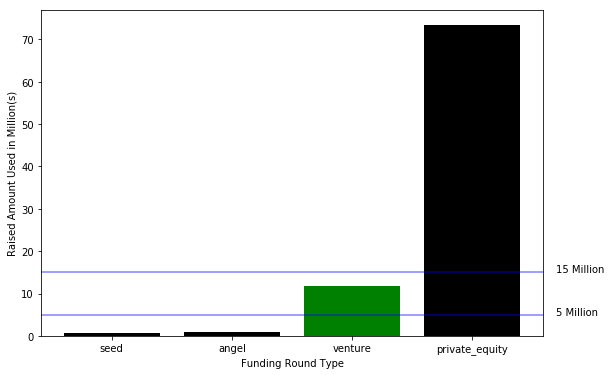

In [82]:
selected_funding_round_type = ['venture','angel','seed','private_equity']
plot_frame = master_frame.loc[master_frame.funding_round_type.isin(selected_funding_round_type)]
plot_frame = plot_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=True).reset_index()
cond = ((plot_frame.raised_amount_usd >= 5000000) & (plot_frame.raised_amount_usd <= 15000000))

x = range(len(plot_frame.funding_round_type))
y = plot_frame.raised_amount_usd/ 1000000

plt.figure(figsize=(9,6))

# Bar plot
plt.bar(x,y,color=cond.map({True: 'g', False: 'k'}))
# Color the funding round type with different color where raised amount used is between 5 to 15 million.

# Labels
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount Used in Million(s)')

# Ticks
plt.xticks(x, plot_frame.funding_round_type)

# Horizontal Line
plt.axhline(y=5, color='b', linestyle='-',alpha = 0.5)
plt.text(max(x)+.7, 5,'5 Million')
plt.axhline(y=15, color='b', linestyle='-',alpha = 0.5)
plt.text(max(x)+.7, 15,'15 Million')

# Save as image
plt.savefig(dir_out+'Funding_Type.png',bbox_inches="tight")

# Show plot
plt.show()